## Model Training - Linear Regression
Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. I will now Train a Linear regression algorithm on the features I have engineered to see how closely we can predict the educational outcomes for students.

### Step 1
Load the required dependencies:

In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

### Step 2
Store the data columns for Linear Regression.

In [3]:
# Create a data frame from the csv file
training_data = pd.read_csv('1.3.2.training_data.csv')

x_name = 'Engagement'
y_name = 'Exam_Score'
x = np.array(training_data[x_name]).reshape(-1, 1)
y = np.array(training_data[y_name])

### Step 3
Plot the feature x and target y data on a graph using the column headings as the graph labels.

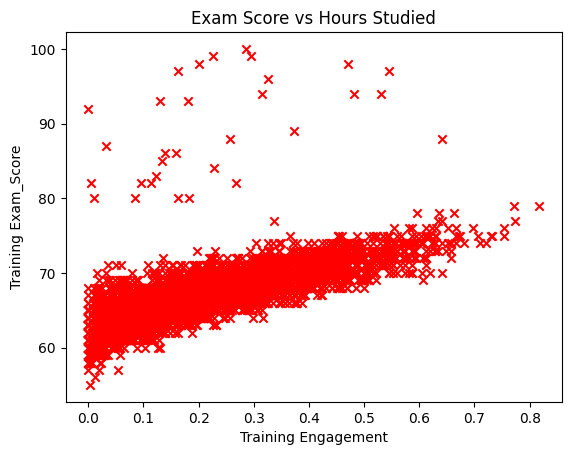

In [4]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Exam Score vs Hours Studied")
# Set the y-axis label
plt.ylabel(f'Training {training_data[y_name].name}')
# Set the x-axis label
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

### Step 4
Use the Scikit-learn library to instantiate a Machine Learning model class and store it in the my_model variable as an object.

In [5]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

### Step 5
Plot the features, targets and model (linear regression).

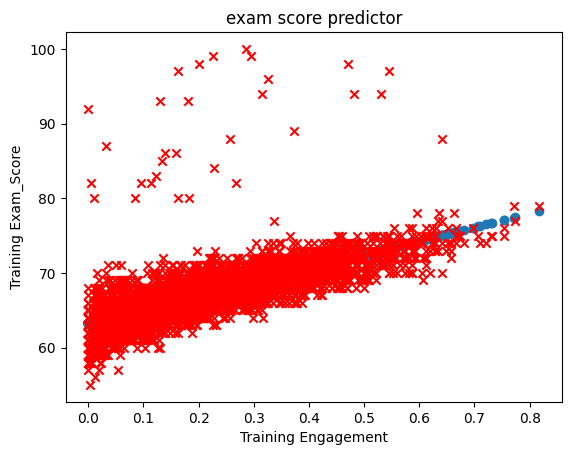

In [6]:
y_pred = my_model.predict(x)
plt.scatter(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("exam score predictor")
plt.ylabel(f'Training {training_data[y_name].name}')
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

In [7]:
# save the model to disk
filename = 'my_saved_model_v1.sav'
pickle.dump(my_model, open('../1.4.Model_Testing_and_Validation/' + filename, 'wb'))

## Step 6. Evaluate the correlation of each feature
I will perform single feature linear regression for each feature and evaluate the score for each to see which correlate best with the target

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data_frame = pd.read_csv('1.3.2.training_data.csv')

# Define the target and the specified features
target = 'Exam_Score'
features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 
            'Tutoring_Sessions', 'Knowledge', 'Study_Aid', 'Engagement']

# Split the data into training and testing sets
X = data_frame[features]
y = data_frame[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform single-feature linear regression for each feature
feature_scores = {}
for feature in features:
    model = LinearRegression()
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    model.fit(X_train_feature, y_train)
    y_pred = model.predict(X_test_feature)
    score = r2_score(y_test, y_pred)
    feature_scores[feature] = score

# Sort and display the results
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
print("R² scores for the specified features:")
for feature, score in sorted_scores:
    print(f"{feature}: {score:.2f}")

R² scores for the specified features:
Engagement: 0.49
Attendance: 0.32
Hours_Studied: 0.21
Knowledge: 0.14
Study_Aid: 0.04
Previous_Scores: 0.03
Tutoring_Sessions: 0.03
Sleep_Hours: -0.00


### Understanding R² Scores for the Specified Features

The R² score, also known as the coefficient of determination, measures how well the independent variable(s) explain the variance in the dependent variable. For each feature, the R² score indicates the proportion of the variance in the target variable (`Exam_Score`) that can be explained by that specific feature when used in a simple linear regression model.

- A higher R² score (closer to 1) means the feature has a strong linear relationship with the target variable and explains a significant portion of its variance.
- A lower R² score (closer to 0) means the feature has a weak linear relationship with the target variable and explains little of its variance.

By comparing the R² scores of the specified features, we can identify which features are most strongly correlated with the target variable and are likely to be more predictive in a linear regression model.

## Step 7. Multiple Variable Linear Regression

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
data_frame = pd.read_csv('1.3.2.training_data.csv')

# Define the target and the specified features
target = 'Exam_Score'
features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 
            'Tutoring_Sessions', 'Knowledge', 'Study_Aid', 'Engagement']

# Split the data into training and testing sets
X = data_frame[features]
y = data_frame[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple variable linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Multiple Variable Linear Regression Results:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Display the coefficients for each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)

Multiple Variable Linear Regression Results:
R² Score: 0.62
Mean Squared Error: 6.01

Feature Coefficients:
             Feature  Coefficient
0      Hours_Studied    11.373588
1         Attendance     7.705137
2    Previous_Scores     1.933509
3        Sleep_Hours    -0.072042
4  Tutoring_Sessions    -3.036303
5          Knowledge     1.045758
6          Study_Aid     3.311244
7         Engagement     0.784075



    - The coefficients represent the relationship between each feature and the target variable.
    - A positive coefficient means that as the feature value increases, the target variable is expected to increase.
    - A negative coefficient means that as the feature value increases, the target variable is expected to decrease.
    - The magnitude of the coefficient indicates the strength of the relationship.

By analyzing these results, you can assess the overall performance of the model and understand the contribution of each feature to the predictions.

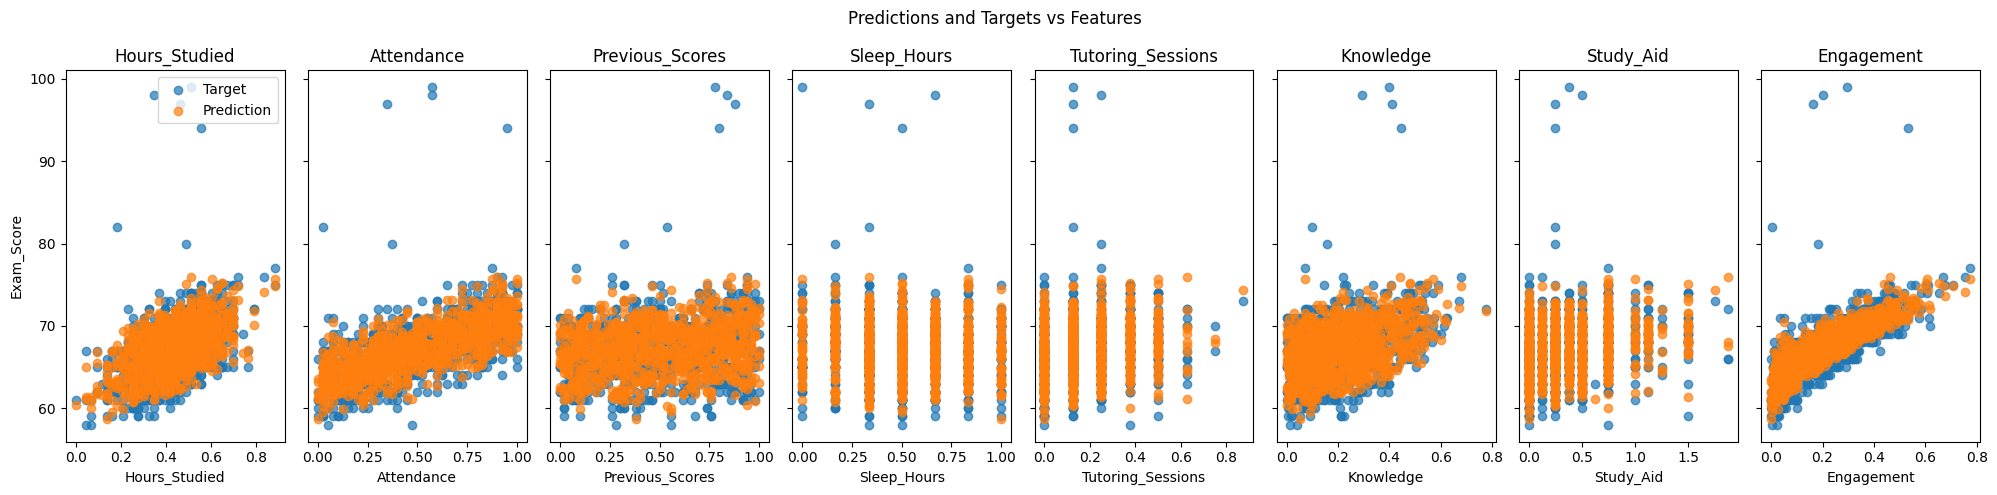

In [10]:
import matplotlib.pyplot as plt

# Plot predictions and targets vs original features
fig, ax = plt.subplots(1, len(features), figsize=(20, 5), sharey=True)

for i, feature in enumerate(features):
    ax[i].scatter(X_test[feature], y_test, label='Target', alpha=0.7)
    ax[i].scatter(X_test[feature], y_pred, label='Prediction', alpha=0.7)
    ax[i].set_xlabel(feature)
    ax[i].set_title(feature)
    
ax[0].set_ylabel("Exam_Score")
ax[0].legend()
fig.suptitle("Predictions and Targets vs Features")
plt.tight_layout()
plt.show()

In [11]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

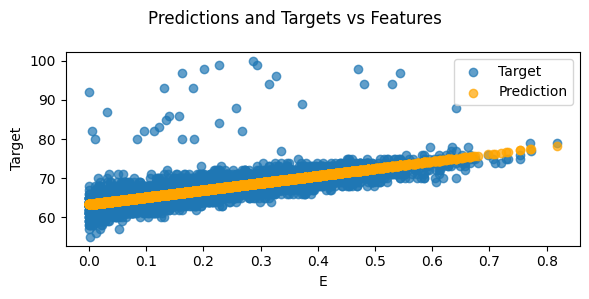

In [12]:
# Generate predictions
y_pred = my_model.predict(x)

# Check if x has multiple features or just one
if x.ndim == 1 or x.shape[1] == 1:
    # Handle the case for a single feature
    fig, ax = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
    ax.scatter(x, y, label='Target', alpha=0.7)
    ax.scatter(x, y_pred, color="orange", label='Prediction', alpha=0.7)
    ax.set_xlabel(x_name[0])
    ax.set_ylabel("Target")
    ax.legend()
else:
    # Handle the case for multiple features
    fig, ax = plt.subplots(1, len(x_name), figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y, label='Target', alpha=0.7)
        ax[i].scatter(x[:, i], y_pred, color="orange", label='Prediction', alpha=0.7)
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target")
    ax[0].legend()

fig.suptitle("Predictions and Targets vs Features")
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
import pickle

# Define the training data
train_data = pd.read_csv('1.3.2.training_data.csv')  # Replace with your training data file
x_train = train_data[['Engagement', 'Knowledge', 'Attendance']]
y_train = train_data['Exam_Score']

# Train the model
model_C = LinearRegression()
model_C.fit(x_train, y_train)

# Save the model
filename = 'my_saved_model_v3sav'
pickle.dump(model_C, open(filename, 'wb'))

In [ ]:
# save the model to disk
filename = 'my_saved_model_v2.sav'
pickle.dump(my_model, open('../1.4.Model_Testing_and_Validation/' + filename, 'wb'))